# DIWALI SALES ANALYSIS 

Introduction
Diwali is an Indian festival that happens annually and in this project we look at the sales of one store during this festival in a certain year.

Problem Statement/Objective
In this project we would like to understand factors that influence the sales in this store, specifically during the Diwali festival period. We would also like to know the demographic distribution of the customers and which products perform better than the others in sales.



In [42]:
## Importing the necessary libraries
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import plotly.express as px

In [43]:
## Loading the dataset 
diwali = pd.read_csv(r"E:\CDAV Class\Diwali Sales Data.csv", encoding='unicode_escape')
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [44]:
## Checking for nulls in the Status column
print(diwali.shape)
print(diwali.Status.isnull().sum())
print(diwali.unnamed1.isnull().sum())

(11251, 15)
11251
11251


The Status and unnamed columns have nulls all through so there is no need of keeping them, we'll go ahead and drop them.

In [45]:
diwali.drop(['Status','unnamed1'], axis=1,inplace=True) 
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [46]:
## Checking unique values in the Product_Category column 
diwali.Product_Category.unique()

array(['Auto', 'Hand & Power Tools', 'Stationery', 'Tupperware',
       'Footwear & Shoes', 'Furniture', 'Food', 'Games & Toys',
       'Sports Products', 'Books', 'Electronics & Gadgets', 'Decor',
       'Clothing & Apparel', 'Beauty', 'Household items', 'Pet Care',
       'Veterinary', 'Office'], dtype=object)

In [47]:
## Listing the column names in our dataset 
diwali.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [48]:
##Create the total sales column for the total amount spent per sale 

diwali['Total Sales'] = diwali.Orders * diwali.Amount 
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Total Sales
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,71802.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,71772.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,47824.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,47754.0


In [49]:
## The Marital_Status column contains 0 and 1 as its values. For clarity, we replace 0 with 'Single' and 1 with 'Married' 

diwali['Marital_Status'].replace(0, 'Single', inplace=True)
diwali['Marital_Status'].replace(1, 'Married', inplace=True)
diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Total Sales
0,1002903,Sanskriti,P00125942,F,26-35,28,Single,Maharashtra,Western,Healthcare,Auto,1,23952.0,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,71802.0
2,1001990,Bindu,P00118542,F,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,71772.0
3,1001425,Sudevi,P00237842,M,0-17,16,Single,Karnataka,Southern,Construction,Auto,2,23912.0,47824.0
4,1000588,Joni,P00057942,M,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0,47754.0


### 1. Customer Demographics and Behavior:
#### - How does purchasing behavior vary across different age groups?
#### - What are the differences in spending between genders?
#### - How does marital status influence purchasing decisions?

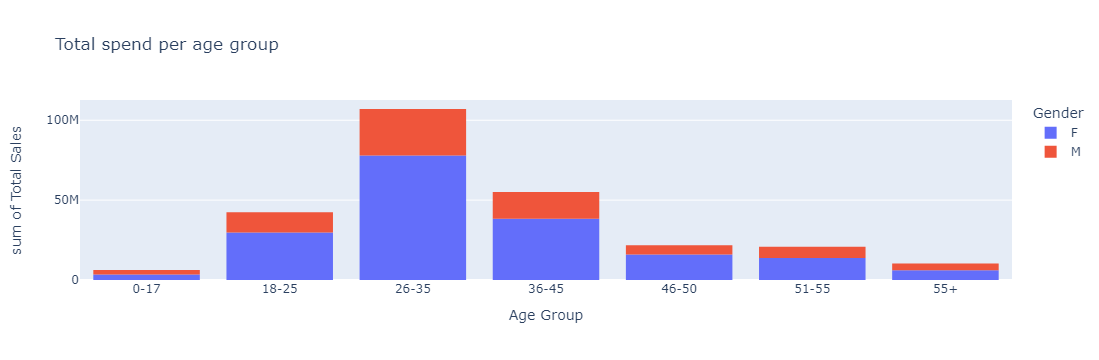

In [50]:
## Box plot for age group vs amount with gender as the hue 

diwali.sort_values('Age Group', inplace=True)

fig = px.histogram(diwali, x='Age Group', y='Total Sales', title='Total spend per age group', color = 'Gender')


fig.show()

From this plot, it's clear that people in the 26-35 age group are the biggest spenders followed by those in the 36-45 and 18-25 age groups. From the visualization above, we can also see that it's a normal distribution. 
It's also evident that the female gender spends more than the male in all age groups.

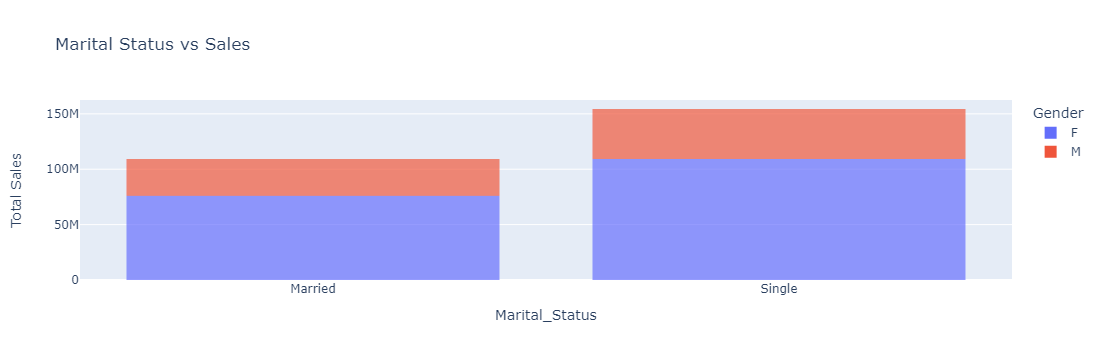

In [83]:
## Relationship between marital status and spending

import plotly.graph_objects as go 
fig=px.bar(diwali, x=diwali['Marital_Status'], y=diwali['Total Sales'], color='Gender', title='Marital Status vs Sales')
fig.update_traces(marker_line_width=0)

fig.show()

Single people spend more compared to their married counterparts. And in both cases females spend more than males

### 2. Geographic Trends:
#### - Which states have the highest sales volume during the Diwali season?
#### - Are there notable differences in product preferences across different zones (e.g., Western, Southern, Central)?

In [68]:
## We need to do a group by on our dataset to be able to separate the states and show the total sales in each state.

regions = diwali.groupby(['State', 'Zone'])['Total Sales'].sum().reset_index()
regions.head()

,State,Zone,Total Sales
0,Andhra Pradesh,Southern,20424086.96
1,Bihar,Eastern,9758622.00
2,Delhi,Central,29013358.40
3,Gujarat,Western,9707424.00
4,Haryana,Northern,10279844.00


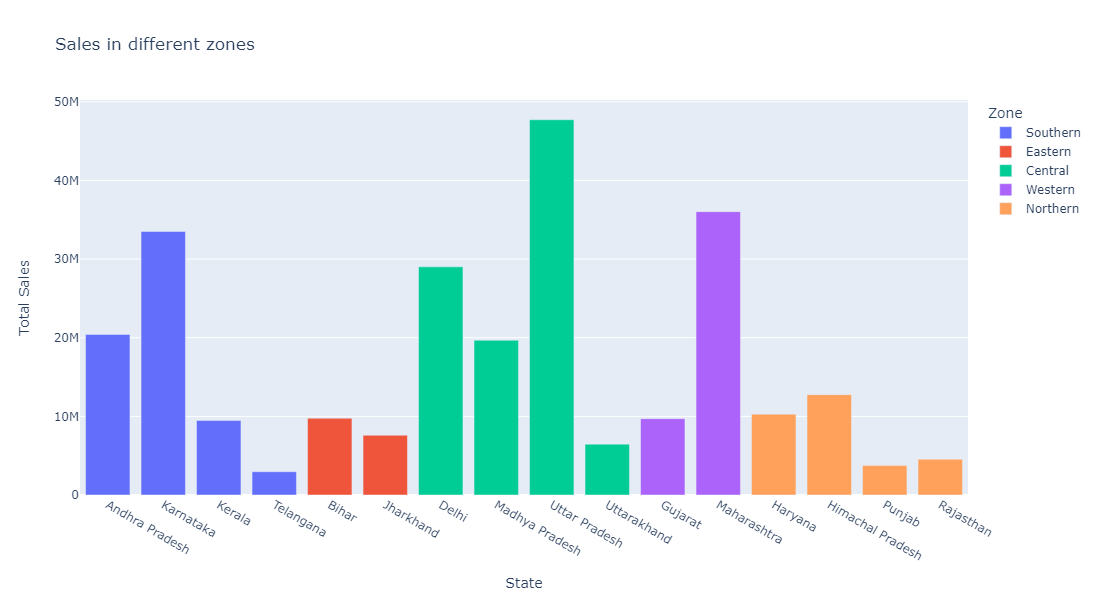

In [82]:
## Showing states vs their total sales, grouped by zones
fig=px.bar(regions,x='State', y='Total Sales', color='Zone', title='Sales in different zones', height=600)
#fig.update_traces(marker_line_width=0)
#fig.update_layout(barmode='group')
#fig.update_layout(barmode='stack')
fig.show()

From the bar graph above, the region with the highest sales is Uttar Pradesh in the Central region. It's also to conclude that the Central region has the highest sales overall

In [70]:
products = diwali.groupby(['Product_Category', 'Zone'])['Total Sales'].sum().reset_index()
products.head()

,Product_Category,Zone,Total Sales
0,Auto,Central,974048.00
1,Auto,Eastern,154518.00
2,Auto,Northern,212788.00
3,Auto,Southern,3174744.96
4,Auto,Western,297081.00


In [84]:
## Relationship between product categories and the zones in which they were sold
#fig=px.bar(products,x='Product_Category', y='Total Sales', color='Zone')
#fig.update_traces(marker_line_width=0)

#fig.show()

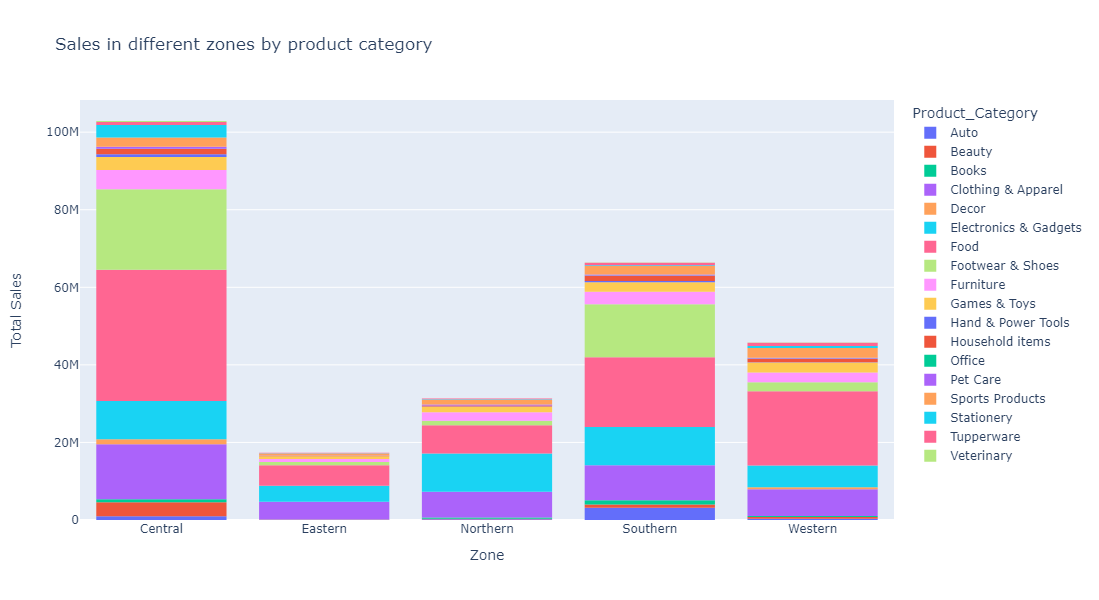

In [85]:
fig=px.bar(products,x='Zone', y='Total Sales', color='Product_Category', title='Sales in different zones by product category', height=600)
fig.update_traces(marker_line_width=0)

fig.show()

Food seems to be the product that sells most in all zones. Some preferences of products in different regions that can be seen are that Auto products sell more in the Southern region than in the Central region, even though the Central region has the most sales overall. Also, electronics and gadgets sell more in the Northern region compared to the Southern, Western, and Central regions which have higher sales overall.

### 3. Product Preferences:
#### - What are the top-selling product categories during Diwali?
Food has the highest sales while Office and Veterinary have the lowest sales as shown in the plot below for Sales by product category.
#### - Which products generate the most revenue, and how does this vary by demographic factors?
#### - Are there any products that perform significantly better in specific regions?
These two can be answered from the plot above for Sales in different zones by product category

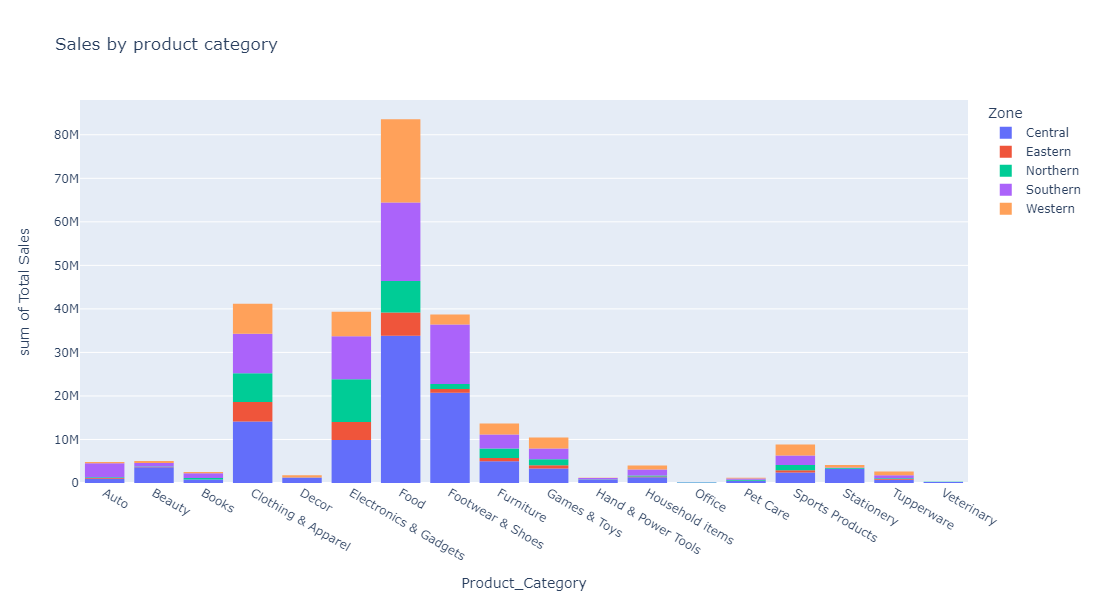

In [93]:
# Which products generate the most revenue, and how does this vary by demographic factors?
fig=px.histogram(products,x='Product_Category',y='Total Sales', color='Zone', title='Sales by product category', height=600)
#fig.update_traces(marker_line_width=0)

fig.show()

### 4. Economic Impact:
#### - How does occupation influence spending patterns during Diwali?
#### - Which occupations tend to spend the most on Diwali shopping?


In [94]:
occupation = diwali.groupby(['Product_Category', 'Occupation'])['Total Sales'].sum().reset_index()
occupation.head()

,Product_Category,Occupation,Total Sales
0,Auto,Agriculture,74436.0
1,Auto,Automobile,426578.0
2,Auto,Aviation,407950.0
3,Auto,Banking,671062.0
4,Auto,Construction,208060.0


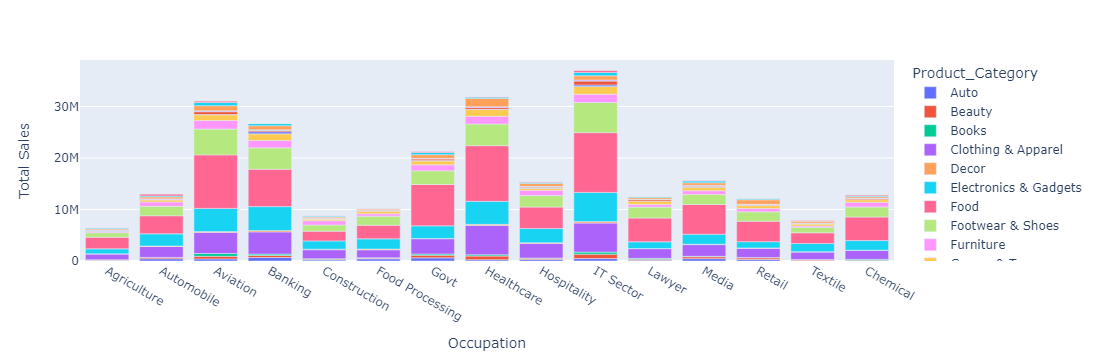

In [95]:
fig=px.bar(occupation,x='Occupation',y='Total Sales', color='Product_Category')

fig.show()

From the plot above, we see that the IT sector has the highest sales followed by the healthcare and Aviation sectors. The Agriculture sector has the lowest sales.

### 5. Order Patterns:
#### - How does the number of orders correlate with the total amount spent?
#### - What are the trends in order volume over time during the Diwali season?

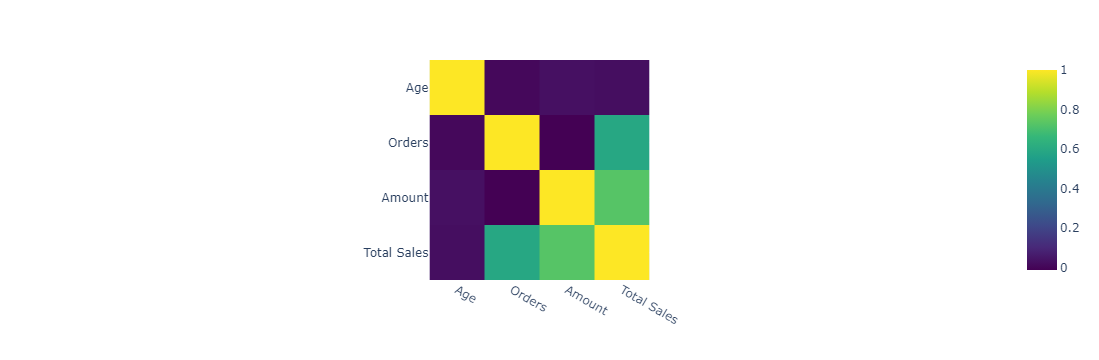

In [57]:
## 5 Showing correlation between different variables
numericals=diwali[['Age','Orders','Amount','Total Sales']]
fig = px.imshow(numericals.corr(), color_continuous_scale='Viridis')
fig.show()


From the heatmap above, there seems to be no correlation between the number of orders and the total amount spent. However, there is a strong positive correlation between the number of orders and total amount spent

### 6. Marketing and Strategy:
#### - How can the data be used to tailor marketing strategies for different demographic groups?
#### - What insights can be drawn to improve customer experience and increase revenue, as outlined in the project's objectives?


Because the female gender and the single people appear to be more spendthrift than males and married people, it would make more sense to market more to the females who are single.

It's also wise to market more electronics and gadgets which sell more in the Northern region compared to the Southern, Western, and Central regions which have higher sales overall. One could either choose to market more electronics and gadgets in other regions to increase sales there or to focus on the region that sells most to increase revenue there.

Electronics and gadgets appear to sell more in the banking sector than in the Aviation and Healthcare sectors which have more sales overall. One could either focus on sales in the bankin sector or choose to improve marketing in the other sectors like Aviation to increase the sales as well.